After increasing the number of training examples with the last model through augmentation, the IOU scores raised significantly. In this model, I will add more augmented images.

In [1]:
%load_ext autoreload
%autoreload 2
from misc import project_utils

import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import tensorflow as tf
# tf.get_logger().setLevel('INFO')
# tf.autograph.set_verbosity(1)
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    print('Invalid device. Error.')
    pass

from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

from random import randint

RANDOM_SEED = 0
BATCH_SIZE = 32
EPOCHS = 100
LEARNING_RATE = 0.0001
ES_PATIENCE = 10
ES_RESTORE_WEIGHTS = True
PLAY_VIDEOS = True

In [2]:
df_train = project_utils.load_image_dataframes('./data/train/', 'annotations.json')
display(df_train)

,id,confidence,y1,x1,y2,x2
0,00001.jpg,1.0,152.0,140.0,397.0,346.0
1,00002.jpg,1.0,144.0,140.0,403.0,345.0
2,00003.jpg,1.0,142.0,138.0,402.0,346.0
3,00004.jpg,1.0,144.0,140.0,405.0,344.0
4,00005.jpg,1.0,141.0,140.0,407.0,344.0
...,...,...,...,...,...,...
12994,12995.jpg,1.0,256.0,208.0,564.0,488.0
12995,12996.jpg,1.0,427.0,475.0,720.0,742.0
12996,12997.jpg,1.0,205.0,129.0,508.0,423.0
12997,12998.jpg,1.0,99.0,97.0,508.0,443.0


In [3]:
df_test = project_utils.load_image_dataframes('./data/test/', 'annotations.json')
display(df_test)

,id,confidence,y1,x1,y2,x2
0,00001.jpg,1.0,220.0,252.0,411.0,437.0
1,00002.jpg,1.0,217.0,241.0,402.0,432.0
2,00003.jpg,1.0,229.0,252.0,416.0,443.0
3,00004.jpg,1.0,243.0,317.0,425.0,487.0
4,00005.jpg,1.0,274.0,332.0,457.0,510.0
...,...,...,...,...,...,...
107,00108.jpg,0.0,0.0,0.0,0.0,0.0
108,00109.jpg,0.0,0.0,0.0,0.0,0.0
109,00110.jpg,0.0,0.0,0.0,0.0,0.0
110,00111.jpg,0.0,0.0,0.0,0.0,0.0


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train, 
    directory='./data/train/', 
    x_col='id', 
    y_col=['confidence', 'y1', 'x1', 'y2', 'x2'], 
    subset='training', 
    batch_size=BATCH_SIZE, 
    seed=RANDOM_SEED, 
    shuffle=True, 
    class_mode='raw', 
    target_size=(224, 224), 
    color_mode='rgb')

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train, 
    directory='./data/train/', 
    x_col='id', 
    y_col=['confidence', 'y1', 'x1', 'y2', 'x2'], 
    subset='validation', 
    batch_size=BATCH_SIZE, 
    seed=RANDOM_SEED, 
    shuffle=True, 
    class_mode='raw', 
    target_size=(224, 224), 
    color_mode='rgb')

Found 10400 validated image filenames.
Found 2599 validated image filenames.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test, 
    directory='./data/test/', 
    x_col='id', 
    y_col=['confidence', 'y1', 'x1', 'y2', 'x2'], 
    batch_size=BATCH_SIZE, 
    seed=RANDOM_SEED, 
    shuffle=True, 
    class_mode='raw', 
    target_size=(224, 224), 
    color_mode='rgb')

Found 112 validated image filenames.


Epoch 1/100
325/325 [==============================] - 101s 277ms/step - loss: 70410.8623 - iou_metric: 0.0740 - val_loss: 21853.2324 - val_iou_metric: 0.2196
Epoch 2/100
325/325 [==============================] - 82s 253ms/step - loss: 20823.2522 - iou_metric: 0.2430 - val_loss: 15138.1221 - val_iou_metric: 0.3339
Epoch 3/100
325/325 [==============================] - 82s 252ms/step - loss: 15228.5115 - iou_metric: 0.3278 - val_loss: 11136.3594 - val_iou_metric: 0.4062
Epoch 4/100
325/325 [==============================] - 82s 252ms/step - loss: 11067.9838 - iou_metric: 0.3935 - val_loss: 8932.1445 - val_iou_metric: 0.4445
Epoch 5/100
325/325 [==============================] - 82s 251ms/step - loss: 8612.7296 - iou_metric: 0.4249 - val_loss: 7613.5884 - val_iou_metric: 0.4688
Epoch 6/100
325/325 [==============================] - 82s 250ms/step - loss: 7209.6898 - iou_metric: 0.4464 - val_loss: 6693.0195 - val_iou_metric: 0.4918
Epoch 7/100
325/325 [==============================] - 8

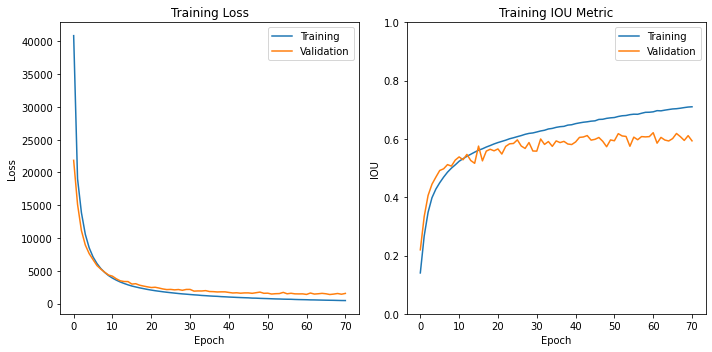

4/4 [==============================] - 9s 3s/step - loss: 4117.3726 - iou_metric: 0.4542
Training Loss: 554.570068359375
Training IOU: 0.6983692646026611
Validation Loss: 1390.9066162109375
Validation IOU: 0.6214920878410339
Testing Loss: 4117.37255859375
Testing IOU: 0.45419567823410034


In [6]:
vgg = keras.applications.VGG19(weights='imagenet', include_top=False, input_tensor=keras.layers.Input(shape=(224, 224, 3)))
vgg.trainable = False

flatten = vgg.output
flatten = keras.layers.Flatten()(flatten)
bbHead = keras.layers.Dense(1024, activation='relu')(flatten)

bbHead = keras.layers.Dense(5, activation='linear', name='bounding_output')(bbHead)



model = keras.models.Model(inputs=vgg.input, outputs=bbHead)
opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(loss='mse', optimizer=opt, metrics=[project_utils.iou_metric])

es = EarlyStopping(monitor='val_iou_metric', mode='max', verbose=1, patience=ES_PATIENCE, restore_best_weights=ES_RESTORE_WEIGHTS)
history = model.fit(train_generator, validation_data=validation_generator, epochs=EPOCHS, callbacks=[es])
project_utils.plot_history(history)

train_results = model.evaluate(train_generator)
validation_results = model.evaluate(validation_generator)
test_results  = model.evaluate(test_generator)
print('Training Loss: {}\nTraining IOU: {}'.format(train_results[0], train_results[1]))
print('Validation Loss: {}\nValidation IOU: {}'.format(validation_results[0], validation_results[1]))
print('Testing Loss: {}\nTesting IOU: {}'.format(test_results[0], test_results[1]))

project_utils.write_results('./history.txt', model, history, train_generator.n, validation_generator.n)

In [7]:
if PLAY_VIDEOS:
    project_utils.play_images_from_datagen(train_generator, model=model, scale_down=True, threshold=0.25, num_to_iter=100)

In [8]:
if PLAY_VIDEOS:
    project_utils.play_images_from_datagen(validation_generator, model=model, scale_down=True, threshold=0.25, num_to_iter=50)

In [9]:
if PLAY_VIDEOS:
    project_utils.play_images_from_datagen(test_generator, model=model, scale_down=True, threshold=0.25)

In [10]:
if PLAY_VIDEOS:
    project_utils.play_images_from_video('../../data/original/test_videos/hand_signs_webcam.mp4', model=model, threshold=0.25)

In [11]:
if PLAY_VIDEOS:
    project_utils.play_images_from_video('../../data/original/test_videos/hand_signs_hand_only.mp4', model=model, threshold=0.25)